<div style="text-align: center; font-size: 20px;"><b>Stats216v: Statistical Learning</b></div>

<br>
<div style="text-align: center">Stanford University</div>
<div style="text-align: center">Summer 2017</div>
<div style="text-align: center">Gyu-Ho Lee (<a href="mailto:gyuhox@gmail.com">gyuhox@gmail.com</a>)</div>

#### 10. Unsupervised Learning

In [43]:
LoadLibraries = function() {
    library(MASS)
    install.packages("ISLR")
    library(ISLR)
    print("Libraries have been loaded!")
}

LoadLibraries()

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


[1] "Libraries have been loaded!"


In [2]:
states = row.names(USArrests)
states

[1] "Alabama"        "Alaska"         "Arizona"        "Arkansas"      
 [5] "California"     "Colorado"       "Connecticut"    "Delaware"      
 [9] "Florida"        "Georgia"        "Hawaii"         "Idaho"         
[13] "Illinois"       "Indiana"        "Iowa"           "Kansas"        
[17] "Kentucky"       "Louisiana"      "Maine"          "Maryland"      
[21] "Massachusetts"  "Michigan"       "Minnesota"      "Mississippi"   
[25] "Missouri"       "Montana"        "Nebraska"       "Nevada"        
[29] "New Hampshire"  "New Jersey"     "New Mexico"     "New York"      
[33] "North Carolina" "North Dakota"   "Ohio"           "Oklahoma"      
[37] "Oregon"         "Pennsylvania"   "Rhode Island"   "South Carolina"
[41] "South Dakota"   "Tennessee"      "Texas"          "Utah"          
[45] "Vermont"        "Virginia"       "Washington"     "West Virginia" 
[49] "Wisconsin"      "Wyoming"

In [4]:
names(USArrests)

[1] "Murder"   "Assault"  "UrbanPop" "Rape"

In [5]:
apply(USArrests, 2, mean)

Murder  Assault UrbanPop     Rape 
   7.788  170.760   65.540   21.232

In [6]:
apply(USArrests, 2, var)

Murder    Assault   UrbanPop       Rape 
  18.97047 6945.16571  209.51878   87.72916

In [8]:
# principal components analysis
# scale=TRUE to scale variables to have standard deviation 1
pr.out = prcomp(USArrests, scale=TRUE)
names(pr.out)

[1] "sdev"     "rotation" "center"   "scale"    "x"

In [9]:
# means for scaling
pr.out$center

# standard deviations for scaling
pr.out$scale

Murder  Assault UrbanPop     Rape 
   7.788  170.760   65.540   21.232

Murder   Assault  UrbanPop      Rape 
 4.355510 83.337661 14.474763  9.366385

In [10]:
# principal components loadings
pr.out$rotation

,PC1,PC2,PC3,PC4
Murder,-0.5358995,0.4181809,-0.3412327,0.64922780
Assault,-0.5831836,0.1879856,-0.2681484,-0.74340748
UrbanPop,-0.2781909,-0.8728062,-0.3780158,0.13387773
Rape,-0.5434321,-0.1673186,0.8177779,0.08902432


In [11]:
# principal score vectors
dim(pr.out$x)

[1] 50  4

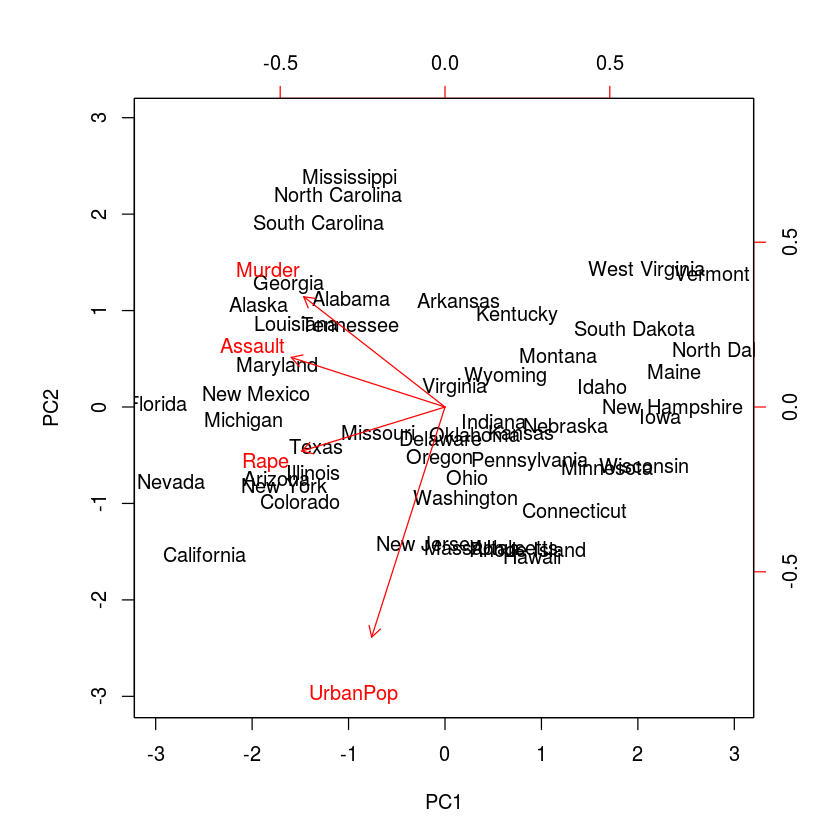

In [12]:
biplot(pr.out, scale=0)

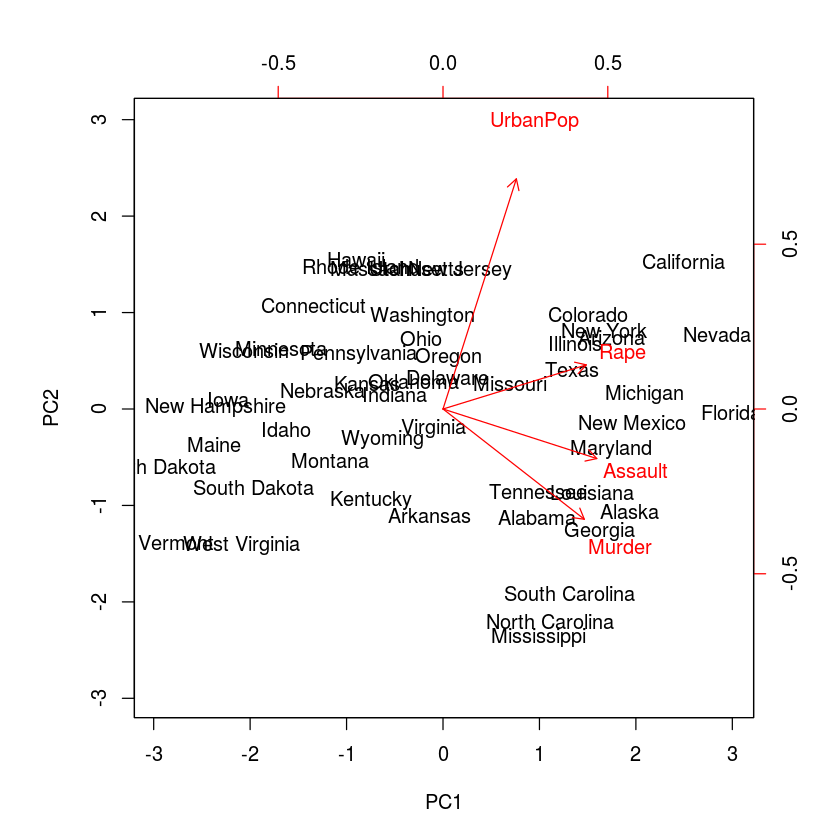

In [13]:
# scale=0 to scale arrows to represent loadings
pr.out$rotation = -pr.out$rotation
pr.out$x = -pr.out$x
biplot(pr.out, scale=0)

In [14]:
pr.out$sdev

[1] 1.5748783 0.9948694 0.5971291 0.4164494

In [17]:
# variance of principal components
pr.var = pr.out$sdev^2
pr.var

[1] 2.4802416 0.9897652 0.3565632 0.1734301

In [18]:
# first principal component explains 62%
pve = pr.var / sum(pr.var)
pve

[1] 0.62006039 0.24744129 0.08914080 0.04335752

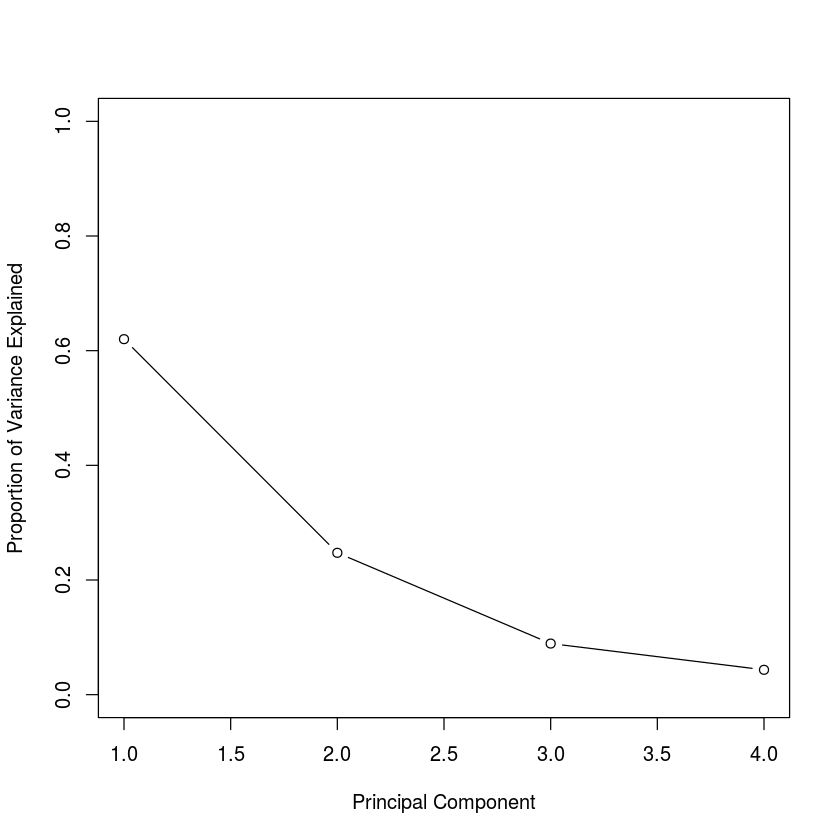

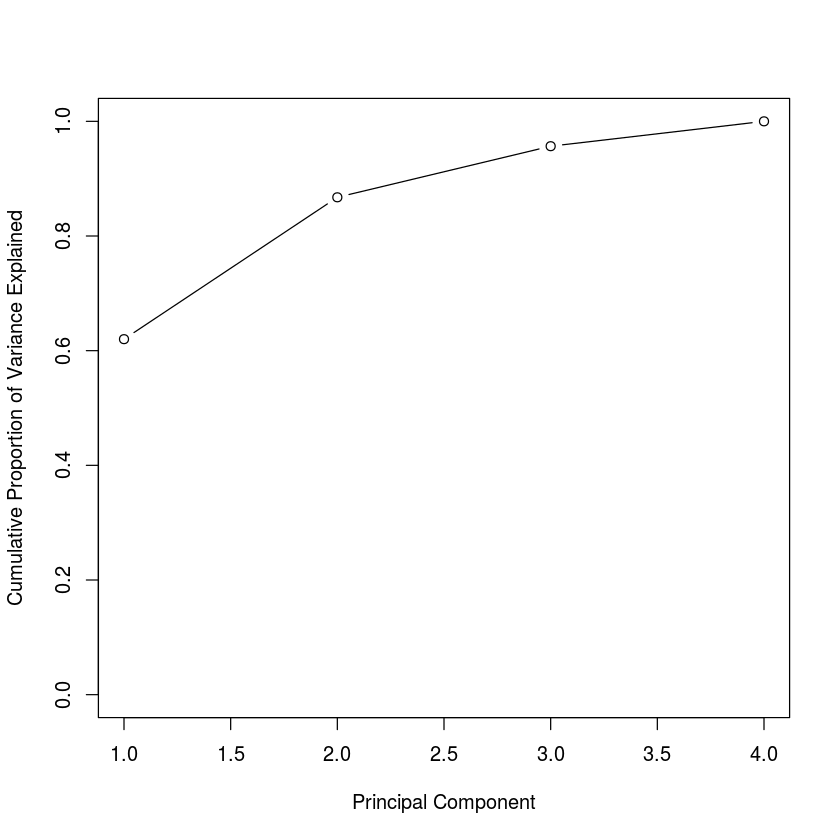

In [19]:
plot(pve, xlab="Principal Component", ylab="Proportion of Variance Explained", ylim=c(0,1), type='b')
plot(cumsum(pve), xlab="Principal Component", ylab="Cumulative Proportion of Variance Explained", ylim=c(0,1), type='b')

In [20]:
a = c(1, 2, 8, -3)
cumsum(a)

[1]  1  3 11  8

In [21]:
# K-means clustering
set.seed(2)
x = matrix(rnorm(50*2), ncol=2)
x[1:25,1] = x[1:25,1] + 3
x[1:25,2] = x[1:25,2] - 4

# K=2
km.out = kmeans(x, 2, nstart=20)
km.out$cluster

[1] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1
[39] 1 1 1 1 1 1 1 1 1 1 1 1

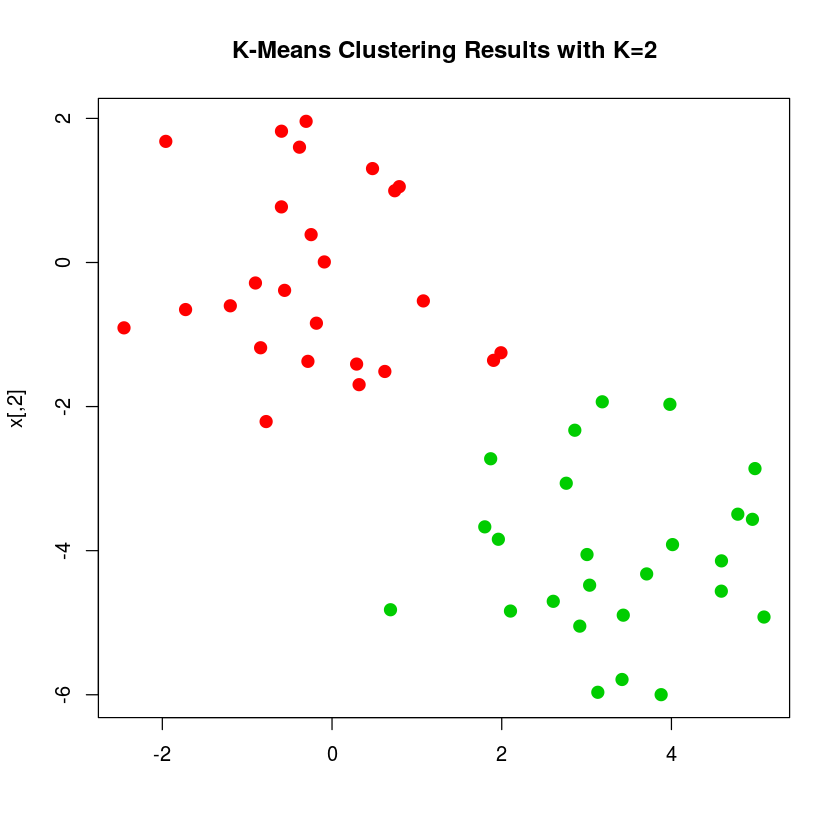

In [23]:
plot(x, col=(km.out$cluster+1), main="K-Means Clustering Results with K=2", xlab="", pch=20, cex=2)

K-means clustering with 3 clusters of sizes 10, 23, 17

Cluster means:
        [,1]        [,2]
1  2.3001545 -2.69622023
2 -0.3820397 -0.08740753
3  3.7789567 -4.56200798

Clustering vector:
 [1] 3 1 3 1 3 3 3 1 3 1 3 1 3 1 3 1 3 3 3 3 3 1 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2
[39] 2 2 2 2 2 1 2 1 2 2 2 2

Within cluster sum of squares by cluster:
[1] 19.56137 52.67700 25.74089
 (between_SS / total_SS =  79.3 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

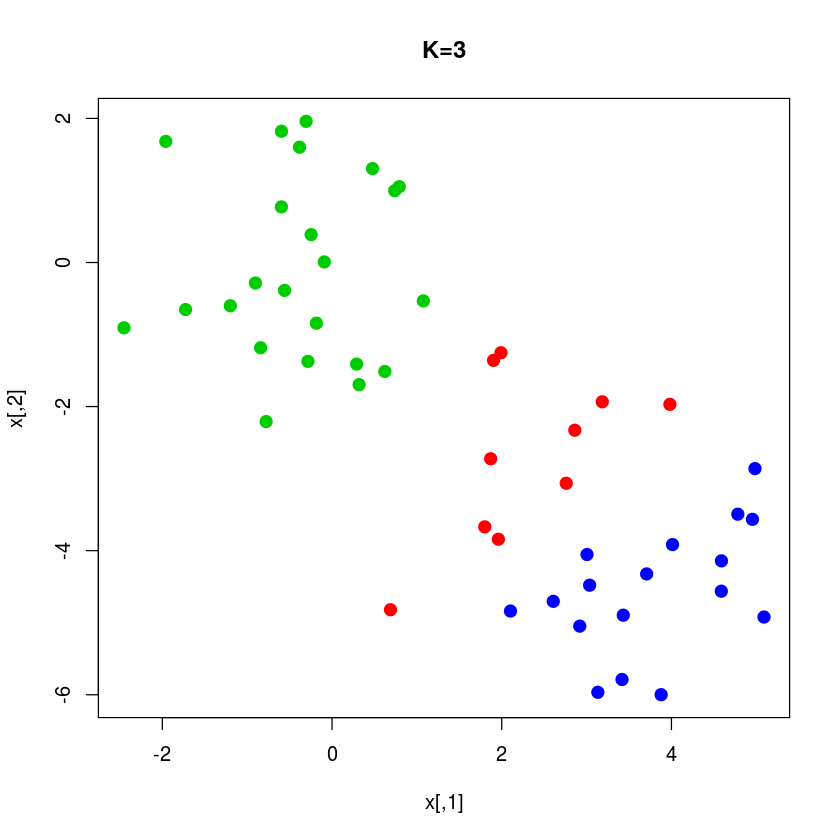

In [24]:
set.seed(4)
km.out = kmeans(x, 3, nstart=20)
km.out

plot(x, col=(km.out$cluster+1), main="K=3", pch=20, cex=2)

In [26]:
# total within-cluster sum of squares
# which we seek to minimize
km.out$tot.withinss

[1] 97.97927

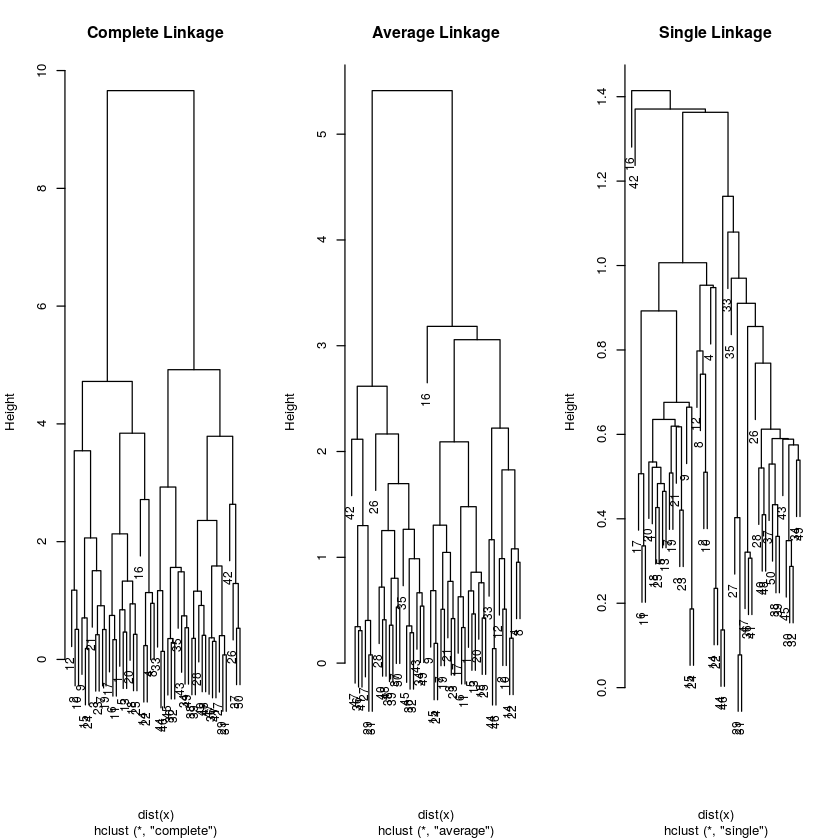

In [27]:
# Hierarchical Clustering
hc.complete = hclust(dist(x), method="complete")
hc.average = hclust(dist(x), method="average")
hc.single = hclust(dist(x), method="single")

par(mfrow=c(1,3))
plot(hc.complete, main="Complete Linkage", cex=.9)
plot(hc.average, main="Average Linkage", cex=.9)
plot(hc.single, main="Single Linkage", cex=.9)

In [29]:
cutree(hc.complete, 2)
cutree(hc.average, 2)
cutree(hc.single, 2)

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
[39] 2 2 2 2 2 2 2 2 2 2 2 2

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 1 2 2 2 2 2
[39] 2 2 2 2 2 1 2 1 2 2 2 2

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[39] 1 1 1 1 1 1 1 1 1 1 1 1

In [30]:
cutree(hc.single, 4)

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3
[39] 3 3 3 4 3 3 3 3 3 3 3 3

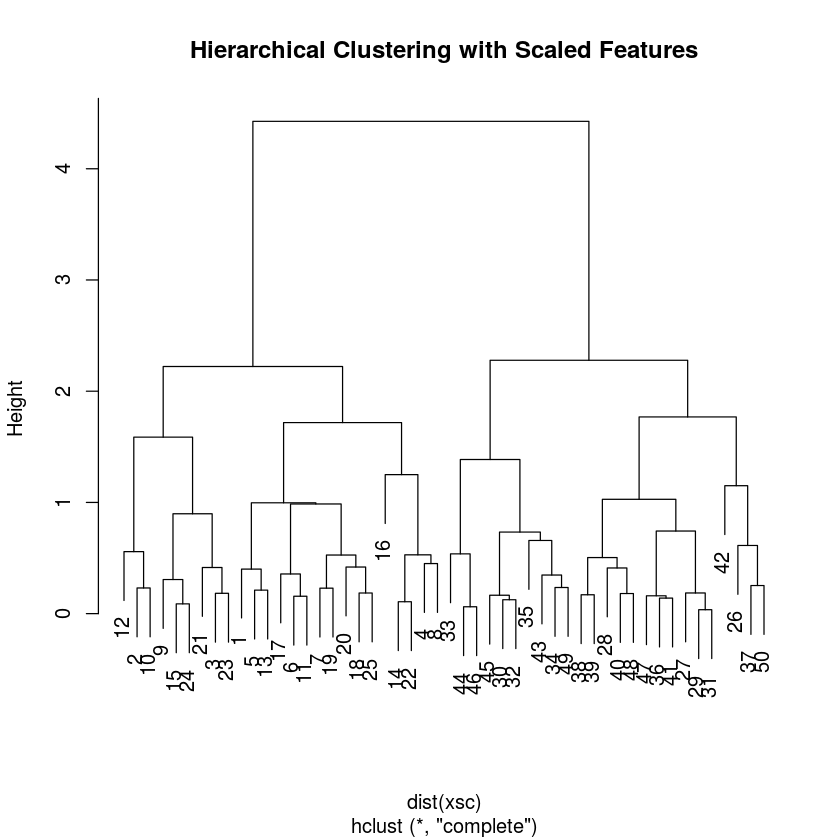

In [31]:
# scale variables before performing hierarchical clustering
xsc = scale(x)
plot(hclust(dist(xsc), method="complete"), main="Hierarchical Clustering with Scaled Features")

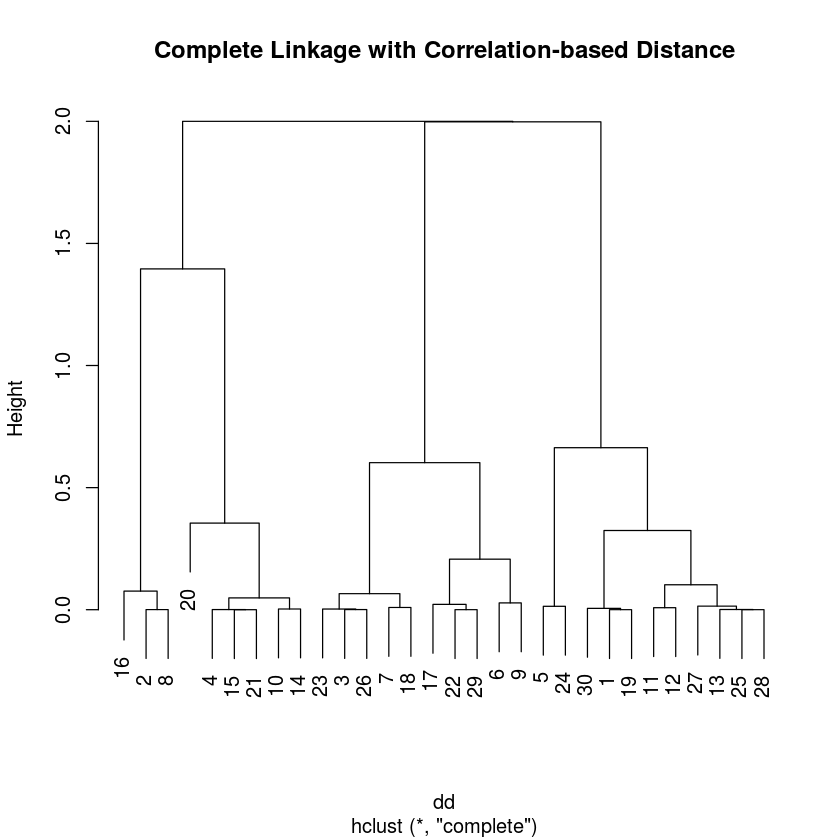

In [32]:
# correlation-based distance
x = matrix(rnorm(30*3), ncol=3)
dd = as.dist(1-cor(t(x)))
plot(hclust(dd, method="complete"), main="Complete Linkage with Correlation-based Distance")

In [33]:
nci.labs = NCI60$labs
nci.data = NCI60$data
dim(nci.data)

[1]   64 6830

In [34]:
nci.labs[1:4]
table(nci.labs)

[1] "CNS"   "CNS"   "CNS"   "RENAL"

nci.labs
     BREAST         CNS       COLON K562A-repro K562B-repro    LEUKEMIA 
          7           5           7           1           1           6 
MCF7A-repro MCF7D-repro    MELANOMA       NSCLC     OVARIAN    PROSTATE 
          1           1           8           9           6           2 
      RENAL     UNKNOWN 
          9           1 

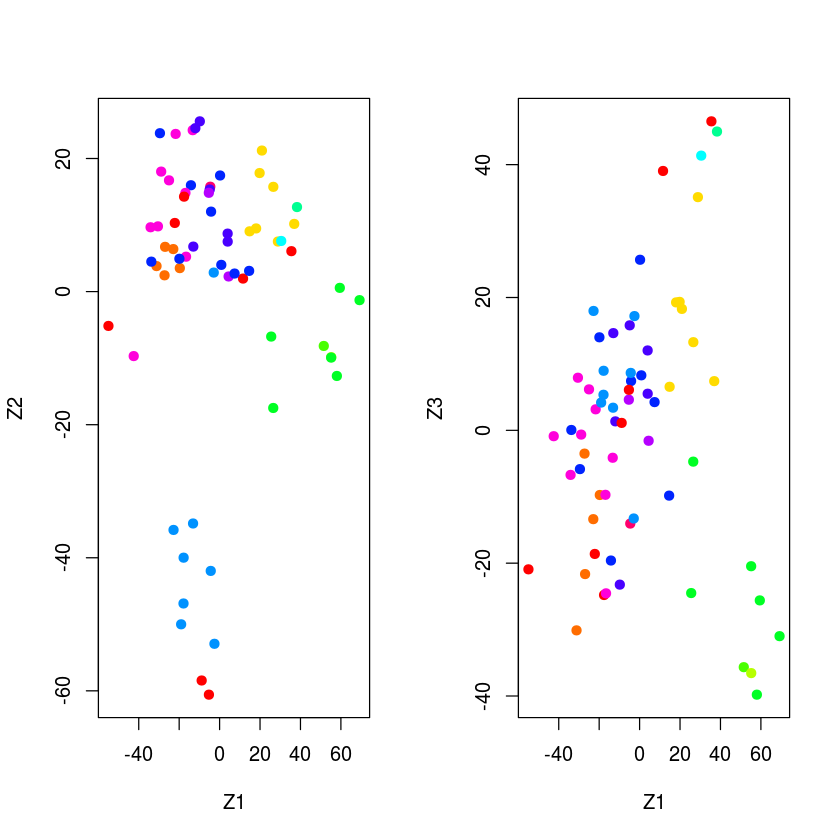

In [35]:
pr.out = prcomp(nci.data, scale=TRUE)

Cols = function(vec) {
    cols = rainbow(length(unique(vec)))
    return (cols[as.numeric(as.factor(vec))])
}

par(mfrow=c(1,2))
plot(pr.out$x[,1:2], col=Cols(nci.labs), pch=19, xlab="Z1", ylab="Z2")
plot(pr.out$x[,c(1,3)], col=Cols(nci.labs), pch=19, xlab="Z1", ylab="Z3")

Importance of components:
                           PC1      PC2      PC3      PC4      PC5      PC6
Standard deviation     27.8535 21.48136 19.82046 17.03256 15.97181 15.72108
Proportion of Variance  0.1136  0.06756  0.05752  0.04248  0.03735  0.03619
Cumulative Proportion   0.1136  0.18115  0.23867  0.28115  0.31850  0.35468
                            PC7      PC8      PC9     PC10     PC11     PC12
Standard deviation     14.47145 13.54427 13.14400 12.73860 12.68672 12.15769
Proportion of Variance  0.03066  0.02686  0.02529  0.02376  0.02357  0.02164
Cumulative Proportion   0.38534  0.41220  0.43750  0.46126  0.48482  0.50646
                           PC13     PC14     PC15     PC16     PC17     PC18
Standard deviation     11.83019 11.62554 11.43779 11.00051 10.65666 10.48880
Proportion of Variance  0.02049  0.01979  0.01915  0.01772  0.01663  0.01611
Cumulative Proportion   0.52695  0.54674  0.56590  0.58361  0.60024  0.61635
                           PC19    PC20     PC21    PC

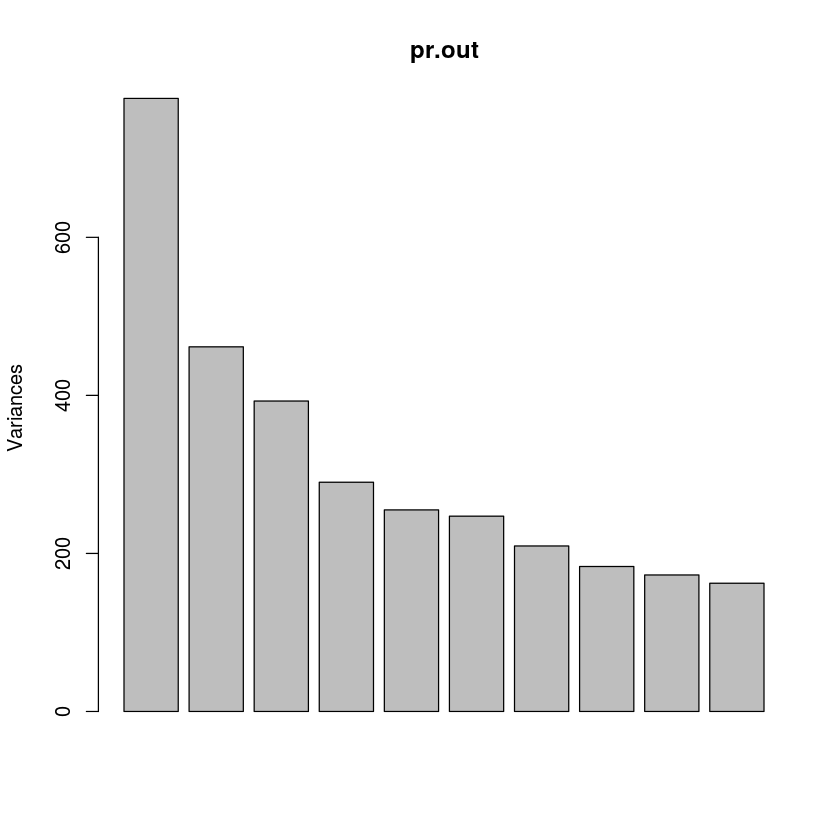

In [36]:
summary(pr.out)
plot(pr.out)

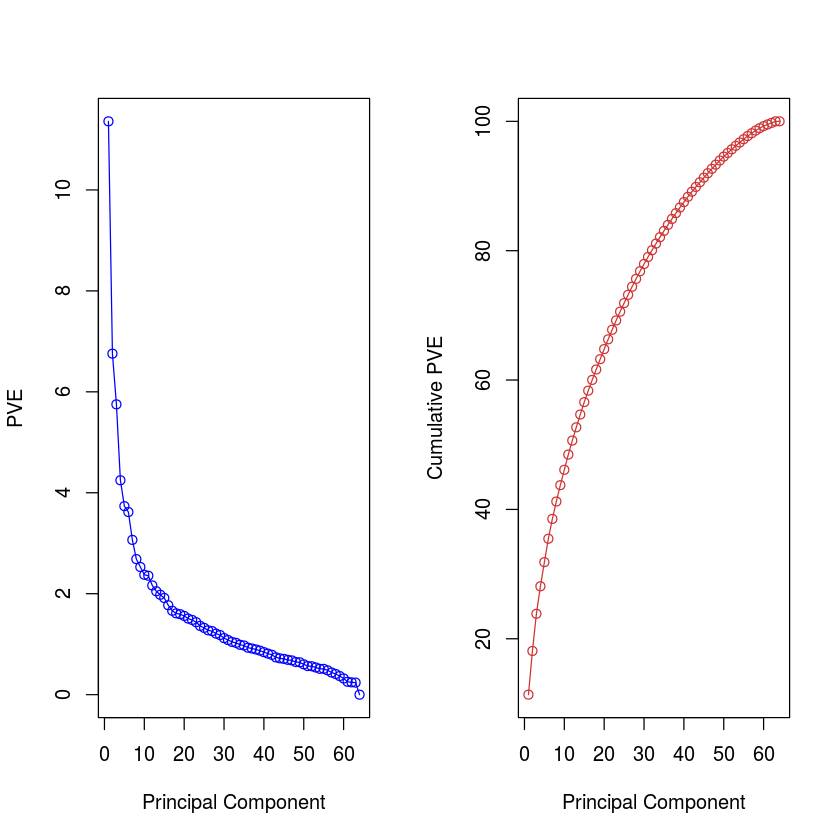

In [37]:
pve = 100*pr.out$sdev^2 / sum(pr.out$sdev^2)
par(mfrow=c(1,2))
plot(pve, type="o", ylab="PVE", xlab="Principal Component", col="blue")
plot(cumsum(pve), type="o", ylab="Cumulative PVE", xlab="Principal Component", col="brown3")

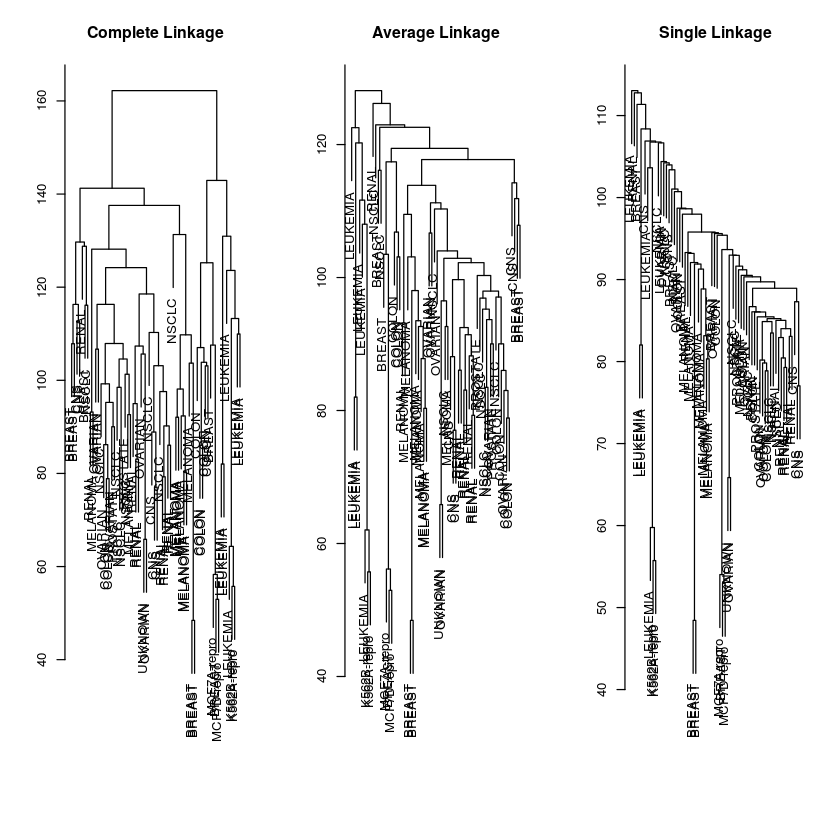

In [38]:
sd.data = scale(nci.data)
par(mfrow=c(1,3))
data.dist = dist(sd.data)

plot(hclust(data.dist, method="complete"), labels=nci.labs, main="Complete Linkage", xlab="", sub="", ylab="")
plot(hclust(data.dist, method="average"), labels=nci.labs, main="Average Linkage", xlab="", sub="", ylab="")
plot(hclust(data.dist, method="single"), labels=nci.labs, main="Single Linkage", xlab="", sub="", ylab="")

           nci.labs
hc.clusters BREAST CNS COLON K562A-repro K562B-repro LEUKEMIA MCF7A-repro
          1      2   3     2           0           0        0           0
          2      3   2     0           0           0        0           0
          3      0   0     0           1           1        6           0
          4      2   0     5           0           0        0           1
           nci.labs
hc.clusters MCF7D-repro MELANOMA NSCLC OVARIAN PROSTATE RENAL UNKNOWN
          1           0        8     8       6        2     8       1
          2           0        0     1       0        0     1       0
          3           0        0     0       0        0     0       0
          4           1        0     0       0        0     0       0

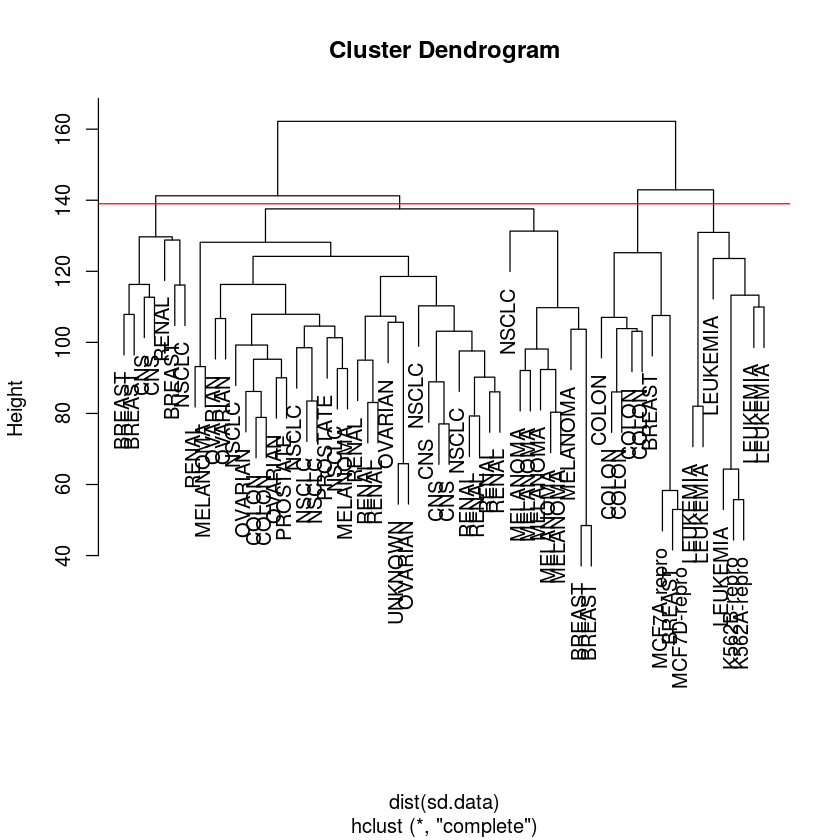

In [39]:
hc.out = hclust(dist(sd.data))
hc.clusters = cutree(hc.out, 4)
table(hc.clusters, nci.labs)

par(mfrow=c(1,1))
plot(hc.out, labels=nci.labs)
abline(h=139, col="red")

In [40]:
hc.out


Call:
hclust(d = dist(sd.data))

Cluster method   : complete 
Distance         : euclidean 
Number of objects: 64 


In [41]:
set.seed(2)
km.out = kmeans(sd.data, 4, nstart=20)
km.clusters = km.out$cluster
table(km.clusters, hc.clusters)

           hc.clusters
km.clusters  1  2  3  4
          1 11  0  0  9
          2  0  0  8  0
          3  9  0  0  0
          4 20  7  0  0

   nci.labs
    BREAST CNS COLON K562A-repro K562B-repro LEUKEMIA MCF7A-repro MCF7D-repro
  1      0   2     7           0           0        2           0           0
  2      5   3     0           0           0        0           0           0
  3      0   0     0           1           1        4           0           0
  4      2   0     0           0           0        0           1           1
   nci.labs
    MELANOMA NSCLC OVARIAN PROSTATE RENAL UNKNOWN
  1        1     8       5        2     7       0
  2        7     1       1        0     2       1
  3        0     0       0        0     0       0
  4        0     0       0        0     0       0

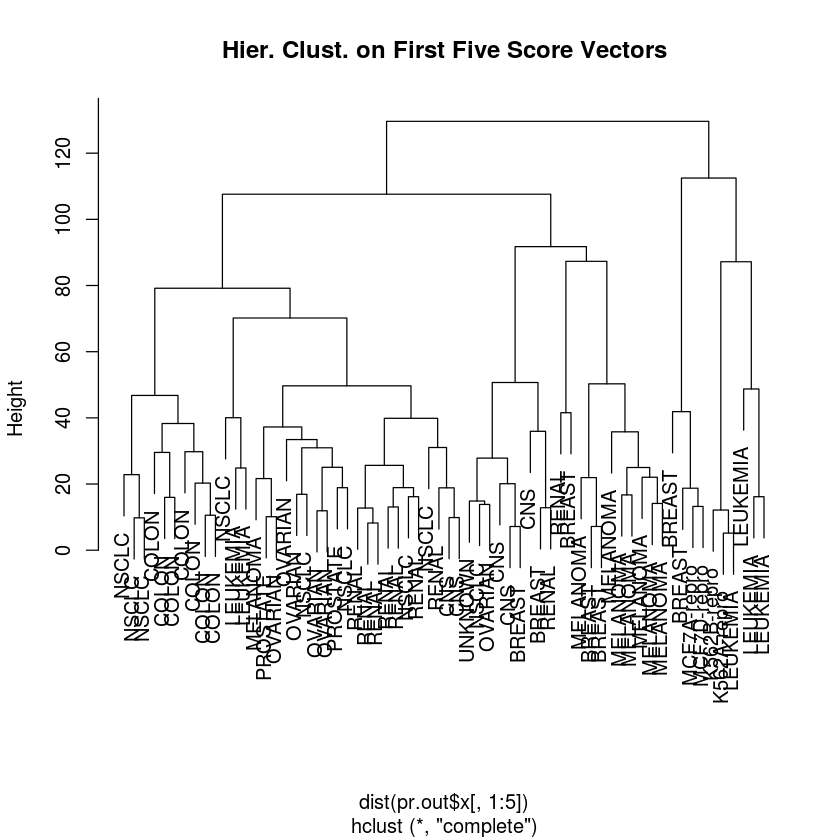

In [42]:
hc.out = hclust(dist(pr.out$x[,1:5]))
plot(hc.out, labels=nci.labs, main="Hier. Clust. on First Five Score Vectors")
table(cutree(hc.out,4), nci.labs)